In [69]:
import pandas as pd
df = pd.read_csv('Predicting_HairLoss.csv')

In [70]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

In [71]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies ', 'Stress',
       'Age', 'Poor Hair Care Habits ', 'Environmental Factors', 'Smoking',
       'Weight Loss ', 'Hair Loss'],
      dtype='object')

In [72]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df = df.rename(columns={'Poor Hair Care Habits ': 'Poor Hair Care Habits'})
df = df.rename(columns={'Nutritional Deficiencies ': 'Nutritional Deficiencies'})
df = df.rename(columns={'Weight Loss ': 'Weight Loss'})
df = df.rename(columns={'Medications & Treatments': 'Medications/Treatments'})

In [73]:
# the distribution of the categorical variable grouped by the target class

target_counts = df['Hair_Loss'].value_counts()
target_ratio = df['Hair_Loss'].value_counts(normalize=True)

print(f"target_counts ['0'] = {target_counts[0]}  target_counts ['1'] = {target_counts[1]}")
print(f"target_ratio ['0'] = {round(target_ratio[0]*100,2)} %  target_ratio ['1'] = {round(target_ratio[1]*100, 2)} %")

target_counts ['0'] = 502  target_counts ['1'] = 497
target_ratio ['0'] = 50.25 %  target_ratio ['1'] = 49.75 %


In [74]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Continuous Variables 

Index(['Id', 'Age', 'Hair_Loss'], dtype='object')
Categorical Variables 

Index(['Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_&_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss'],
      dtype='object')


Continuous Variables Visualization 



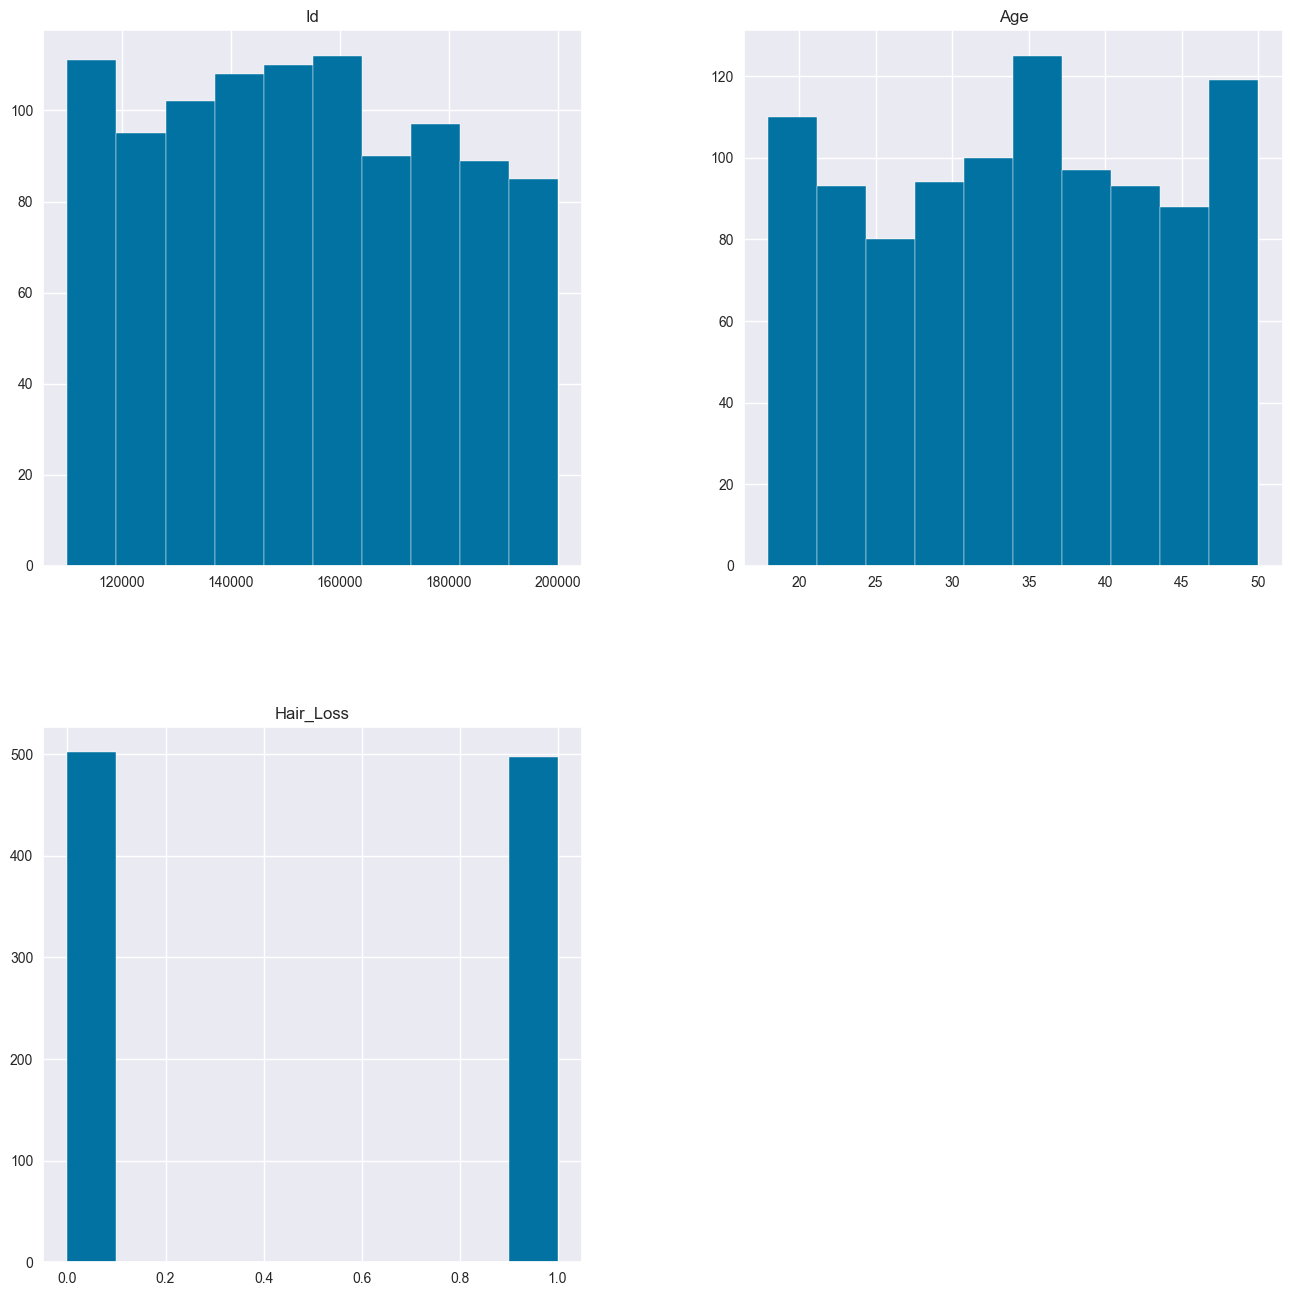

In [75]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16, 16))
plt.show()

Categorical Variables Visualization_test 



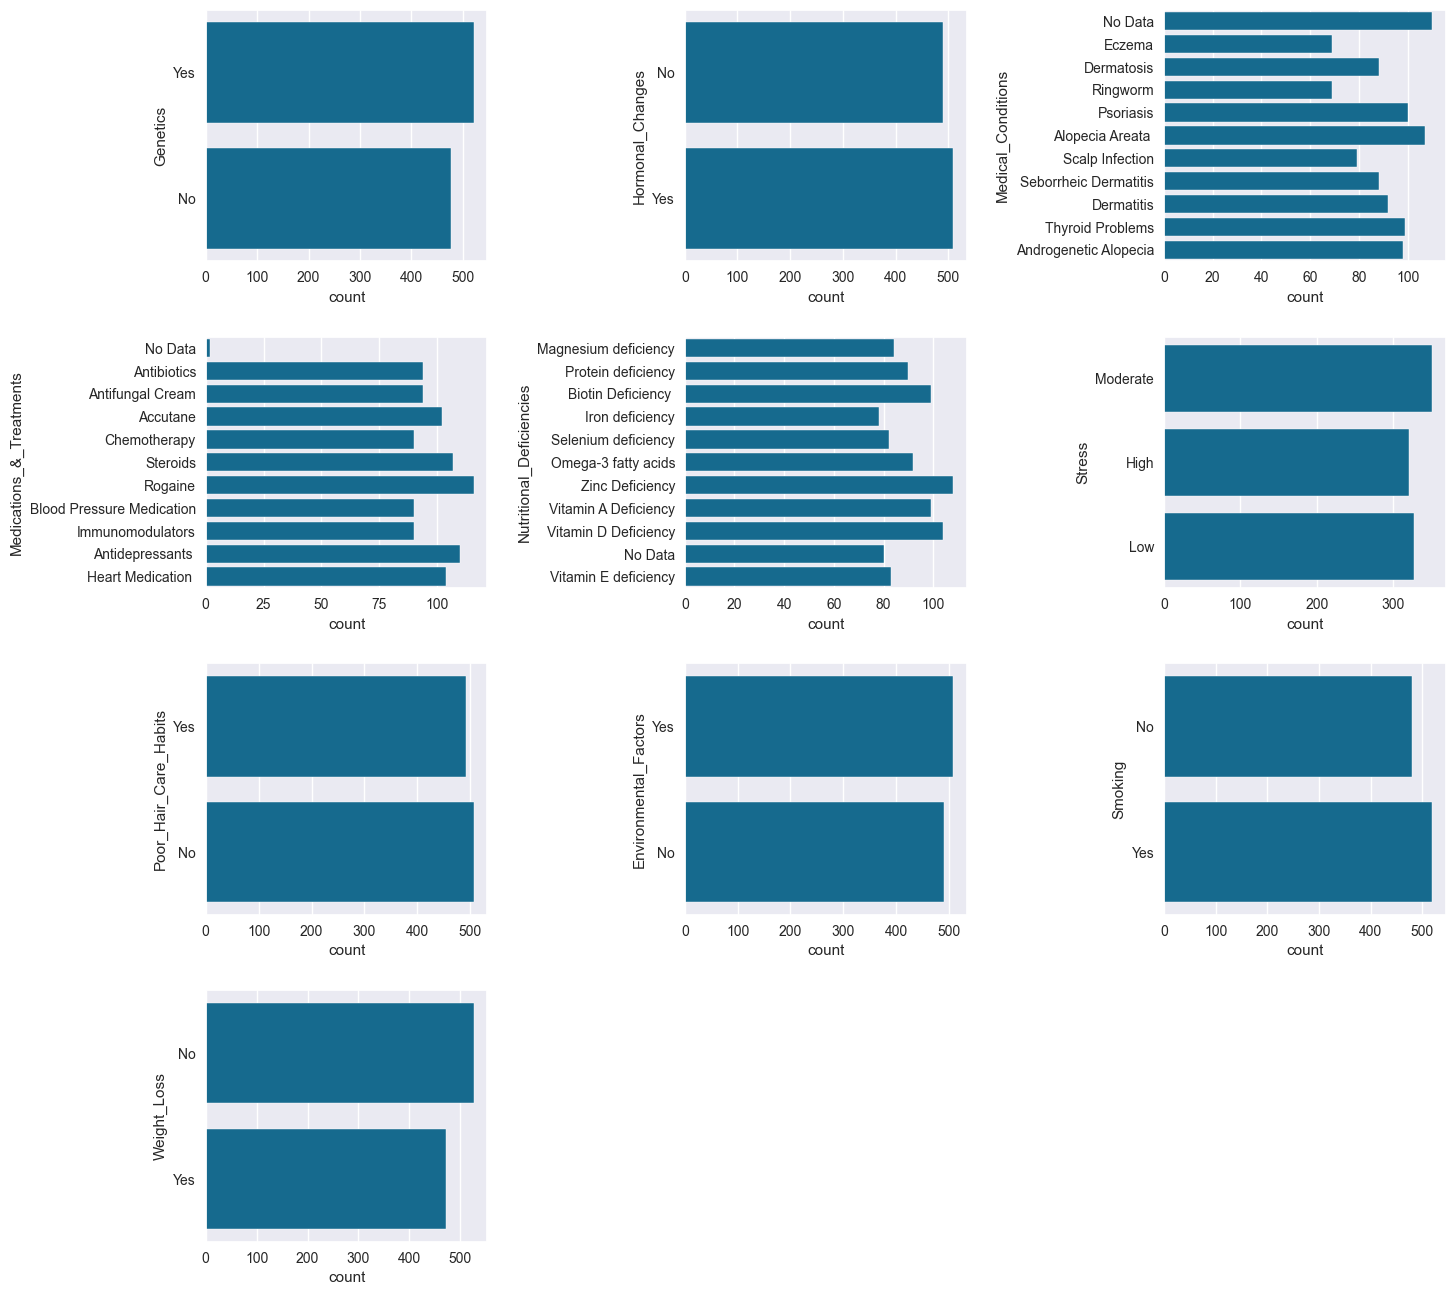

In [76]:
print("Categorical Variables Visualization_test","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

In [77]:
df = df.replace({'Yes':1, 'No':0})

In [78]:
df['Nutritional_Deficiencies'].unique()

array(['Magnesium deficiency', 'Protein deficiency', 'Biotin Deficiency ',
       'Iron deficiency', 'Selenium deficiency', 'Omega-3 fatty acids',
       'Zinc Deficiency', 'Vitamin A Deficiency', 'Vitamin D Deficiency',
       'No Data', 'Vitamin E deficiency'], dtype=object)

In [79]:
df.duplicated().value_counts()

False    999
Name: count, dtype: int64

In [80]:
df.dtypes

Id                           int64
Genetics                     int64
Hormonal_Changes             int64
Medical_Conditions          object
Medications_&_Treatments    object
Nutritional_Deficiencies    object
Stress                      object
Age                          int64
Poor_Hair_Care_Habits        int64
Environmental_Factors        int64
Smoking                      int64
Weight_Loss                  int64
Hair_Loss                    int64
dtype: object

In [81]:
df_train = df.drop(["Id"], axis=1)

In [82]:
df_train.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [83]:
columns = df_train.select_dtypes(include=[object]).columns
df = pd.concat([df_train, pd.get_dummies(df_train[columns])], axis=1)
df = df.drop(['Medical_Conditions', 'Medications_&_Treatments', 'Nutritional_Deficiencies', 'Stress'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Genetics                                            999 non-null    int64
 1   Hormonal_Changes                                    999 non-null    int64
 2   Age                                                 999 non-null    int64
 3   Poor_Hair_Care_Habits                               999 non-null    int64
 4   Environmental_Factors                               999 non-null    int64
 5   Smoking                                             999 non-null    int64
 6   Weight_Loss                                         999 non-null    int64
 7   Hair_Loss                                           999 non-null    int64
 8   Medical_Conditions_Alopecia Areata                  999 non-null    bool 
 9

In [84]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

In [85]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Genetics                                            999 non-null    float64
 1   Hormonal_Changes                                    999 non-null    float64
 2   Age                                                 999 non-null    float64
 3   Poor_Hair_Care_Habits                               999 non-null    float64
 4   Environmental_Factors                               999 non-null    float64
 5   Smoking                                             999 non-null    float64
 6   Weight_Loss                                         999 non-null    float64
 7   Hair_Loss                                           999 non-null    float64
 8   Medical_Conditions_Alopecia Areata                  999 non-null    float64
 9  

In [86]:
y = data_scaled['Hair_Loss']
data = data_scaled
data_scaled = data_scaled.drop(['Hair_Loss'], axis = 1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [89]:
from pycaret.classification import *

In [90]:
from sklearn.metrics import make_scorer, fbeta_score
def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

In [91]:
setup_clf = setup(data = data, target = 'Hair_Loss', train_size = 0.8,
                  session_id=777, preprocess=False)

,Description,Value
0,Session id,777
1,Target,Hair_Loss
2,Target type,Binary
3,Original data shape,"(999, 44)"
4,Transformed data shape,"(999, 44)"
5,Transformed train set shape,"(799, 44)"
6,Transformed test set shape,"(200, 44)"
7,Numeric features,43


In [92]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [93]:
model = compare_models(sort = 'f1', fold = 5, n_select = 5, include = ['lda', 'knn', 'lr', 'dt', 'ada'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:19:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5181,0.5180,0.4976,0.5171,0.5069,0.0361,0.0361,0.0160
knn,K Neighbors Classifier,0.4955,0.5054,0.5151,0.4930,0.5034,-0.0087,-0.0085,0.0220
ada,Ada Boost Classifier,0.5018,0.5011,0.4950,0.5007,0.4970,0.0037,0.0038,0.0680
lr,Logistic Regression,0.4956,0.4973,0.4849,0.4932,0.4874,-0.0088,-0.0087,0.0160
lda,Linear Discriminant Analysis,0.4943,0.4967,0.4798,0.4915,0.4842,-0.0114,-0.0113,0.0140


In [94]:
tuned_top5 = [tune_model(i) for i in model]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:02
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4625,0.4678,0.5385,0.4565,0.4941,-0.0710,-0.0721
1,0.5500,0.5403,0.1500,0.7500,0.2500,0.1000,0.1667
2,0.7000,0.6509,0.6000,0.7500,0.6667,0.4000,0.4082
3,0.5375,0.5728,0.2500,0.5882,0.3509,0.0750,0.0917
4,0.5750,0.5409,0.5250,0.5833,0.5526,0.1500,0.1508
5,0.4875,0.4584,0.4000,0.4848,0.4384,-0.0250,-0.0254
6,0.5375,0.5337,0.5250,0.5385,0.5316,0.0750,0.0750
7,0.5125,0.5169,0.5500,0.5116,0.5301,0.0250,0.0251
8,0.5625,0.5816,0.5000,0.5714,0.5333,0.1250,0.1260


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4250,0.3946,0.4359,0.4146,0.4250,-0.1493,-0.1495
1,0.5250,0.5356,0.5250,0.5250,0.5250,0.0500,0.0500
2,0.5750,0.5869,0.5250,0.5833,0.5526,0.1500,0.1508
3,0.5000,0.5219,0.5000,0.5000,0.5000,0.0000,0.0000
4,0.5250,0.5325,0.4750,0.5278,0.5000,0.0500,0.0503
5,0.5375,0.5300,0.4750,0.5429,0.5067,0.0750,0.0756
6,0.5875,0.5856,0.6000,0.5854,0.5926,0.1750,0.1751
7,0.5750,0.5206,0.6000,0.5714,0.5854,0.1500,0.1502
8,0.5125,0.5038,0.5250,0.5122,0.5185,0.0250,0.0250


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5116,0.9744,0.4935,0.6552,0.0226,0.0609
1,0.4750,0.4844,0.6250,0.4808,0.5435,-0.0500,-0.0524
2,0.4750,0.4962,0.7250,0.4833,0.5800,-0.0500,-0.0577
3,0.5375,0.5403,0.7750,0.5254,0.6263,0.0750,0.0852
4,0.5375,0.5262,0.7000,0.5283,0.6022,0.0750,0.0793
5,0.5000,0.4350,0.7500,0.5000,0.6000,0.0000,0.0000
6,0.4750,0.4834,0.5750,0.4792,0.5227,-0.0500,-0.0510
7,0.5375,0.5150,0.8000,0.5246,0.6337,0.0750,0.0881
8,0.5125,0.5156,0.7000,0.5091,0.5895,0.0250,0.0270


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5250,0.5047,0.4872,0.5135,0.5000,0.0482,0.0483
1,0.5375,0.5906,0.6000,0.5333,0.5647,0.0750,0.0756
2,0.5000,0.5119,0.5750,0.5000,0.5349,0.0000,0.0000
3,0.5375,0.5994,0.6000,0.5333,0.5647,0.0750,0.0756
4,0.5875,0.5919,0.6250,0.5814,0.6024,0.1750,0.1755
5,0.5250,0.5062,0.4750,0.5278,0.5000,0.0500,0.0503
6,0.4750,0.4462,0.4500,0.4737,0.4615,-0.0500,-0.0501
7,0.4625,0.4369,0.4250,0.4595,0.4416,-0.0750,-0.0752
8,0.4250,0.4188,0.4000,0.4211,0.4103,-0.1500,-0.1502


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5875,0.5253,0.5385,0.5833,0.5600,0.1729,0.1734
1,0.5250,0.5819,0.6250,0.5208,0.5682,0.0500,0.0510
2,0.4875,0.5156,0.5500,0.4889,0.5176,-0.0250,-0.0252
3,0.5750,0.6056,0.6250,0.5682,0.5952,0.1500,0.1508
4,0.6000,0.6031,0.6000,0.6000,0.6000,0.2000,0.2000
5,0.5375,0.5156,0.4500,0.5455,0.4932,0.0750,0.0762
6,0.4875,0.4731,0.4250,0.4857,0.4533,-0.0250,-0.0252
7,0.4500,0.4412,0.4000,0.4444,0.4211,-0.1000,-0.1005
8,0.4250,0.4219,0.4000,0.4211,0.4103,-0.1500,-0.1502


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [95]:
blended_model = blend_models(estimator_list = tuned_top5,
                       fold = 10,
                       method = 'soft',
                       optimize='f1',
                       )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:20:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5625,0.4866,0.5641,0.5500,0.5570,0.1250,0.1250
1,0.5750,0.6044,0.5750,0.5750,0.5750,0.1500,0.1500
2,0.5250,0.5706,0.5500,0.5238,0.5366,0.0500,0.0501
3,0.6250,0.6156,0.6750,0.6136,0.6429,0.2500,0.2513
4,0.6125,0.6006,0.6000,0.6154,0.6076,0.2250,0.2251
5,0.5000,0.4706,0.4500,0.5000,0.4737,0.0000,0.0000
6,0.5625,0.5231,0.5250,0.5676,0.5455,0.1250,0.1254
7,0.4750,0.4831,0.5250,0.4773,0.5000,-0.0500,-0.0503
8,0.4875,0.4875,0.4500,0.4865,0.4675,-0.0250,-0.0251


In [96]:
y_prob = blended_model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = blended_model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0.35746685 0.64253315]
 [0.56280116 0.43719884]
 [0.57293426 0.42706574]
 [0.46918894 0.53081106]
 [0.25056281 0.74943719]
 [0.38158282 0.61841718]
 [0.4265814  0.5734186 ]
 [0.37153115 0.62846885]
 [0.64718027 0.35281973]
 [0.68227462 0.31772538]]
Estimated classes: [1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]



In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("F2:", f2_func(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.875
F1: 0.8780487804878049
F2: 0.896414342629482
ROC AUC: 0.9424942494249424


In [99]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes             85            16
Actual no               9            90


In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       101
         1.0       0.85      0.91      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



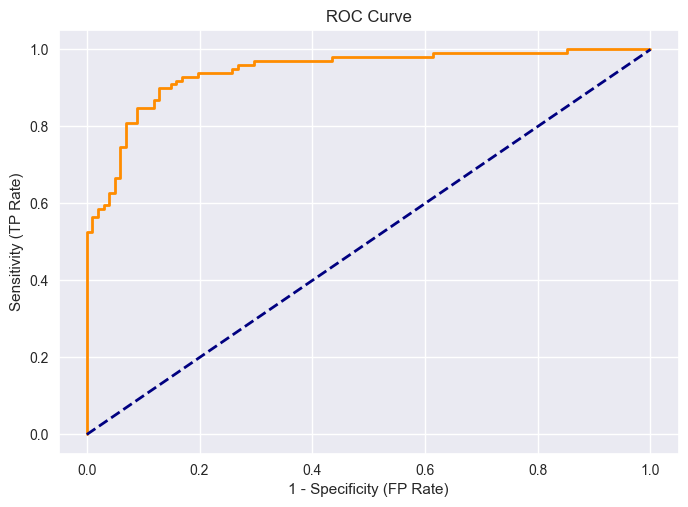

In [102]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()